In [2]:
#%%
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from model import LogisticRegression



In [3]:
#%%
def get_corr_matrix(data: pd.DataFrame,
                    target: pd.DataFrame) -> pd.DataFrame:
    
    # visualize correlation matrix
    df = data.copy()
    df["result"] = target
    corr_matrix = df.corr()

    return corr_matrix

def drop_low_corr(data: np.ndarray,
                  target: np.ndarray,
                  corr_lim: float = 0.1) -> pd.DataFrame:
    # drop low correlation features
    corr_matrix = get_corr_matrix(data=data,
                                target=target)
    low_correlation = corr_matrix["result"][abs(corr_matrix["result"]) < corr_lim]
    for col in low_correlation.keys():
        data.drop(col, axis = 1)

    return data

In [4]:

#%%
# if __name__ == "__main__":
# Load breast cancer data
data, target = load_breast_cancer(return_X_y=True,
                                as_frame=True)

# drop low correlated data
high_corr_data = drop_low_corr(data, target, corr_lim=0.1)

# scaling data
scaler = StandardScaler()
model = scaler.fit(high_corr_data)
scaled_data = model.transform(high_corr_data)


# split the train and test dataset
X_train, X_test,\
    y_train, y_test = train_test_split(scaled_data, target,
                                    test_size=0.30,
                                    random_state=20)

epoch 0, loss 7.797304700256966
epoch 1, loss 5.159572485035485
epoch 2, loss 0.5587124987942566
epoch 3, loss 0.21112201492659824
epoch 4, loss 0.181561669487987
epoch 5, loss 0.16459648494060564
epoch 6, loss 0.15280108299843012
epoch 7, loss 0.1437002157090281
epoch 8, loss 0.1362775996393989
epoch 9, loss 0.13003583772125743
epoch 10, loss 0.12469112637423531
epoch 11, loss 0.12006096440894515
epoch 12, loss 0.11601729542673529
epoch 13, loss 0.11246451058979731
epoch 14, loss 0.10932798096235921
epoch 15, loss 0.10654758524294089
epoch 16, loss 0.10407381449278824
epoch 17, loss 0.10186522754555702
epoch 18, loss 0.09988676266268992
epoch 19, loss 0.09810851958634285
epoch 20, loss 0.09650487079279682
epoch 21, loss 0.09505377717082314
epoch 22, loss 0.0937362314609849
epoch 23, loss 0.09253582293552846
epoch 24, loss 0.09143836916649499
epoch 25, loss 0.09043161182763389
epoch 26, loss 0.08950491888272197
epoch 27, loss 0.08864909587431981
epoch 28, loss 0.08785610883328818
epoch

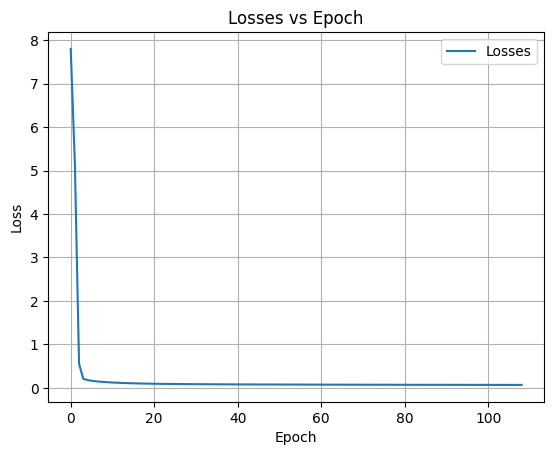

In [5]:
#%%
# train model
y_train = np.resize(y_train, (y_train.shape[0], 1))
LogReg = LogisticRegression(X_train, y_train)
LogReg.fit()

In [6]:
# evaluation for training
y_train_pred = LogReg.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"training accuracy: {accuracy_train}")

# %%
# evaluation for testing
print('TESTING TESTING')
y_test_pred = LogReg.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"testing accuracy: {accuracy_test}")


training accuracy: 0.9773869346733668
TESTING TESTING
testing accuracy: 0.9707602339181286
